In [1]:
#importing all related libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Uber_rides.csv')
data.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 1:25,1/2/16 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
data.keys()

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    1155 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1155 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.2+ KB


In [5]:
#replacing missing values with PURPOSE* equals to "other"
data['PURPOSE*'].replace(np.nan, 'Other', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    1155 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1155 non-null float64
PURPOSE*       1155 non-null object
dtypes: float64(1), object(6)
memory usage: 63.2+ KB


### Getting the number of rides per ride purpose

In [6]:
data['PURPOSE*'].value_counts()

Other              502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64

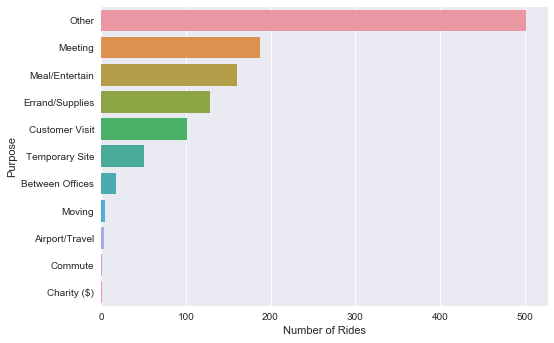

In [7]:
#creating a dataframe containing type of purpose and the number of rides associated with each purpose
ride_count = data['PURPOSE*'].value_counts().tolist()
ride_purpose= data['PURPOSE*'].value_counts().index.tolist()
ride_info = list(zip(ride_purpose,ride_count))
ride_info = pd.DataFrame(ride_info,columns=['PURPOSE','COUNT'])

ax = sns.barplot(x='COUNT',y='PURPOSE',data=ride_info,order=ride_info['PURPOSE'].tolist())
ax.set(xlabel='Number of Rides', ylabel='Purpose')
plt.show()


### Rides by category

In [8]:
data['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

### Getting the average number of miles per purpose

In [9]:
ride_summary = data.groupby('PURPOSE*').mean()
ride_summary

,MILES*
PURPOSE*,
Airport/Travel,5.500000
Between Offices,10.944444
Charity ($),15.100000
Commute,180.200000
Customer Visit,20.688119
Errand/Supplies,3.968750
Meal/Entertain,5.698125
Meeting,15.247594
Moving,4.550000


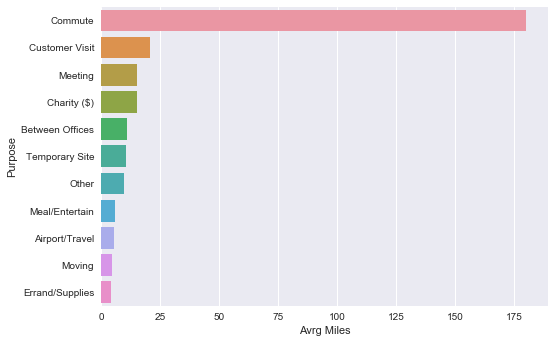

In [10]:
ride_summary['PURPOSE*']=ride_summary.index.tolist()
ax = sns.barplot(x='MILES*',y='PURPOSE*',data=ride_summary,order=ride_summary.sort_values('MILES*',ascending=False)['PURPOSE*'].tolist())
ax.set(xlabel='Avrg Miles', ylabel='Purpose')
plt.show()

## Cleaning data to find number of rides per month

In [11]:
start_list = [info.split(' ') for info in data['START_DATE*'].tolist()]
stop_list = [info.split(' ') for info in data['END_DATE*'].tolist()]

start_df  = pd.DataFrame(start_list,columns=['Start_Date','Start_Time'])
end_df  = pd.DataFrame(stop_list,columns=['End_Date','End_Time'])

sub_data = data[['CATEGORY*','START*','STOP*','MILES*','PURPOSE*']]
start_end_info = pd.concat([start_df,end_df,],axis=1)

In [12]:
rides = pd.concat([start_end_info,sub_data],axis=1)

In [13]:
rides.head(5)

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16,21:11,1/1/16,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16,1:25,1/2/16,1:37,Business,Fort Pierce,Fort Pierce,5.0,Other
2,1/2/16,20:25,1/2/16,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16,17:31,1/5/16,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16,14:42,1/6/16,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [14]:
rides.groupby('Start_Date').sum()

,MILES*
Start_Date,
1/1/16,5.1
1/10/16,49.3
1/11/16,11.6
1/12/16,27.2
1/13/16,23.0
1/14/16,25.8
1/15/16,28.8
1/18/16,9.5
1/19/16,14.8


In [15]:
rides_per_month = rides.groupby('Start_Date').sum()
rides_per_month['Month']=pd.to_datetime(rides_per_month.index.tolist()) #converting dates to a python friendly format
rides_per_month['Month']= rides_per_month['Month'].dt.to_period("M") #grouping dates by month
rides_per_month= rides_per_month.sort_values(by= 'Month',ascending=True)

In [16]:
total_miles_per_month= rides_per_month.groupby('Month').sum()

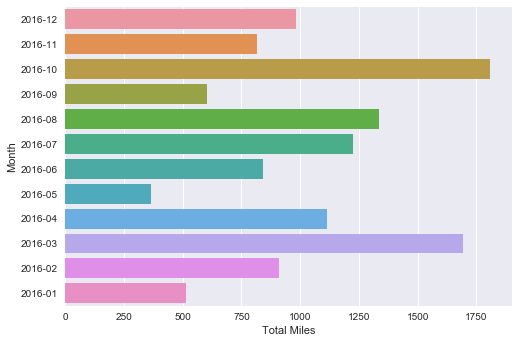

In [17]:
total_miles_per_month['MONTH']=total_miles_per_month.index.tolist()
total_miles_per_month['MONTH']=total_miles_per_month['MONTH'].astype(str) #converting the time stamp format to string
ax = sns.barplot(x='MILES*',y='MONTH',data=total_miles_per_month,order=total_miles_per_month.sort_values('MONTH',ascending=False)['MONTH'].tolist())
ax.set(xlabel='Total Miles', ylabel='Month')
plt.show()

## Network Analysis

In [18]:
g = nx.Graph()

In [19]:
g= nx.from_pandas_dataframe(rides,source='START*',target='STOP*',edge_attr=['Start_Date','Start_Time','End_Date','End_Time','CATEGORY*','MILES*','PURPOSE*'])

In [20]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 209
Number of edges: 280
Average degree:   2.6794


### Visualizing all the rides as a network

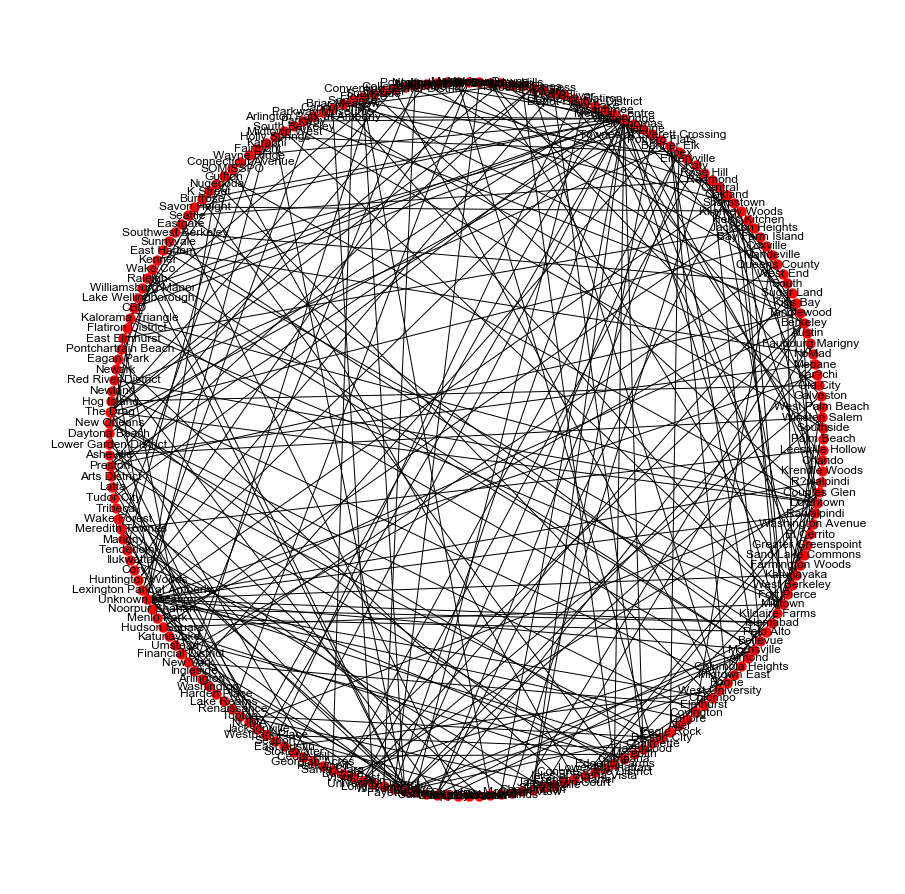

In [21]:
plt.figure(figsize=(12,12)) 
nx.draw_circular(g,with_labels=True,node_size=100)
plt.show()

## Degree distribution per location

In [22]:
#identifying which location is being visited more frequently (whether for pickup or dropoff)
location=[]
degree=[]
for node in g:
    location.append(node)
    degree.append(g.degree(node))

degree_dist_list = list (zip(location,degree))
degree_dist = pd.DataFrame(degree_dist_list, columns=['Location','Degree'])
degree_dist.sort(columns='Degree',ascending=False)

,Location,Degree
37,Whitebridge,26
151,Cary,18
120,Unknown Location,15
193,Midtown,14
203,Downtown,12
188,Morrisville,9
11,Berkeley,8
26,Central,7
102,The Drag,7
127,New York,6


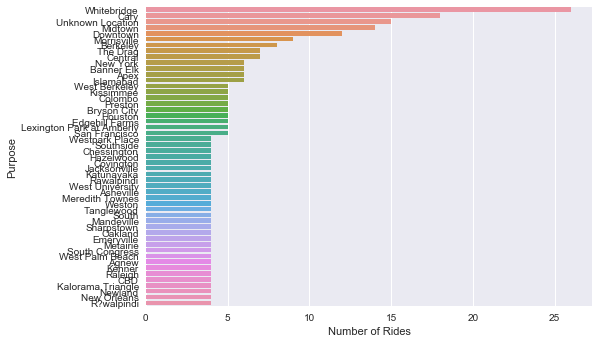

In [23]:
#plotting locations that were visited at least 4 times.
ax = sns.barplot(x='Degree',y='Location',data=degree_dist[degree_dist['Degree']>=4],order=degree_dist[degree_dist['Degree']>=4].sort_values('Degree',ascending=False)['Location'].tolist())
ax.set(xlabel='Number of Rides', ylabel='Purpose')
plt.figure(figsize=(30,20))
plt.show()

### Visualizing the ride network for PURPOSE* == 'Meeting'

In [24]:
#since the highest number of rides were for meeting purposes, here I visualize this network of rides
g2= nx.Graph()
g2 = nx.from_pandas_dataframe(rides[rides['PURPOSE*']=='Meeting'],source='START*',target='STOP*')

Name: 
Type: Graph
Number of nodes: 83
Number of edges: 71
Average degree:   1.7108


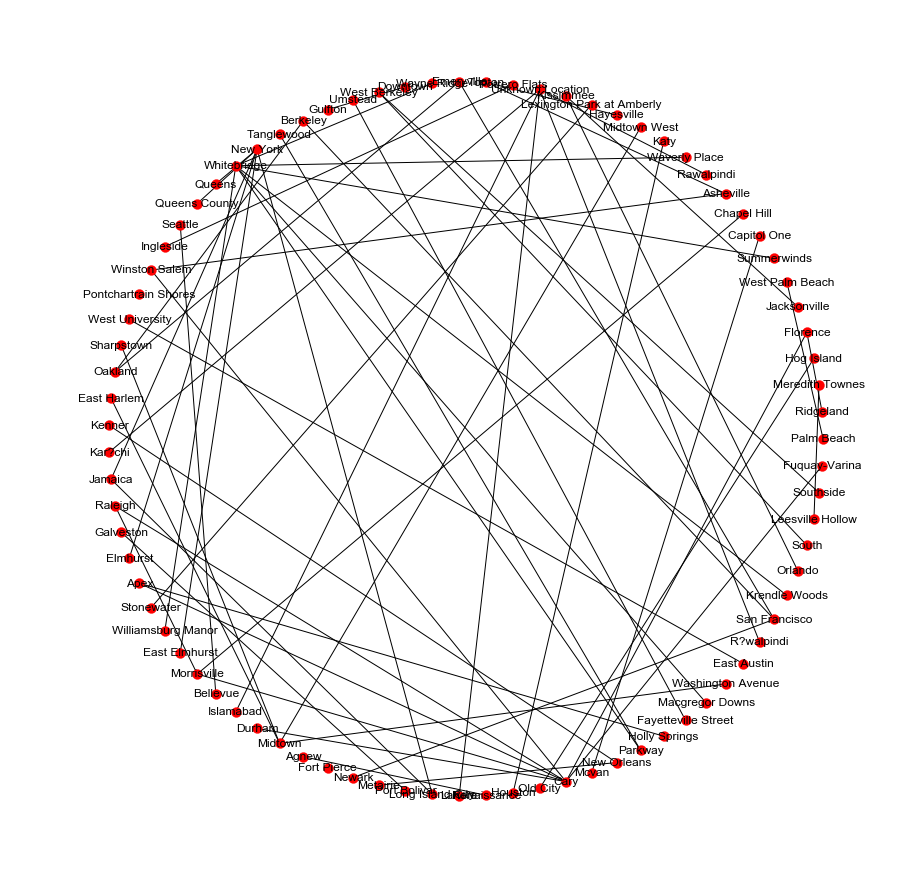

In [25]:
print (nx.info(g2))
plt.figure(figsize=(12,12)) 
nx.draw_shell(g2,with_labels=True,node_size=100)
plt.show()

### Identifying the location with the highest number of nodes (pickups/dropoffs)

In [26]:
location_2=[]
degree_2=[]
for node in g2:
    location_2.append(node)
    degree_2.append(g.degree(node))

degree_dist_list_2 = list (zip(location_2,degree_2))
degree_dist_2 = pd.DataFrame(degree_dist_list_2, columns=['Location','Degree'])
degree_dist_2.sort(columns='Degree',ascending=False)

,Location,Degree
30,Whitebridge,26
66,Cary,18
18,Unknown Location,15
55,Midtown,14
23,Downtown,12
51,Morrisville,9
27,Berkeley,8
47,Apex,6
53,Islamabad,6
29,New York,6
